This notebook implements an dynamic graph showing the relationship between river discharge and river height for different levels of roughness, using <A href="http://www.fsl.orst.edu/geowater/FX3/help/8_Hydraulic_Reference/Manning_s_Equation.htm">Manning's equation</A>.

Author: <A href="http://www.geog.leeds.ac.uk/people/a.evans">Dr Andy Evans</A>  
Licence: <A href="https://opensource.org/licenses/AFL-3.0">Academic Free License 3.0</A>

It uses a variety of Python libraries, including <A href="http://ipywidgets.readthedocs.io/en/latest/examples/Using%20Interact.html">Jupyter Widgets</A> for the scrollbars.

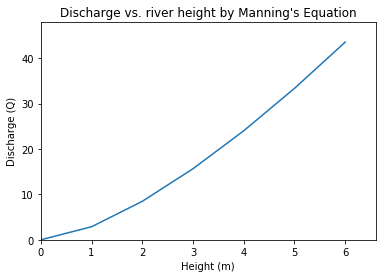

<function __main__.mannings(slope=10, n_roughness=10, width=10, bank_angle=10)>

In [1]:
%matplotlib inline
import matplotlib.pyplot
import numpy
import math
import ipywidgets 


def mannings (slope = 10 ,n_roughness = 10, width = 10, bank_angle = 10) :
    """
    Generates a Manning plot.
    All values in meters and degrees, save n_roughness, which is dimensionless.
    """
    
    # Depth data
    d1 = numpy.asarray([0.0,1.0,2.0,3.0,4.0,5.0,6.0]);

    # Starting dischange data
    d2 = numpy.asarray([0.0,0.0,0.0,0.0,0.0,0.0,0.0]);

    # For each depth, calculate the discharge
    for i in range(0,len(d1)) :
        radians = bank_angle * (math.pi / 180);
        ob = d1[i] * math.tan(radians);
        tri = ((0.5 * ob) * d1[i]);
        area = (width * d1[i]) + (2 * tri);
        hyp = (d1[i] / math.cos(radians));
        wetted = (2 * hyp) + width;
        r = area / wetted;
        d2[i] = ((((math.pow(r,(2.0/3.0)))*(math.pow(slope,(1.0/2.0))))/n_roughness)*(area));  

    # Plot the data
    fig = matplotlib.pyplot.figure()
    subfig = fig.add_subplot(111)

    line = subfig.plot(d1, d2)
    subfig.set_xlim(numpy.min(d1), numpy.max(d1) * 1.1)
    subfig.set_ylim(numpy.min(d2), numpy.max(d2) * 1.1)

    subfig.set_title("Discharge vs. river height by Manning's Equation")
    subfig.set_xlabel("Height (m)")
    subfig.set_ylabel("Discharge (Q)")

    matplotlib.pyplot.show()
    # End of function

# Display scrollbars. These rerun the mannings function.
ipywidgets.widgets.interact(mannings, 
                            s = ipywidgets.widgets.IntSlider(min=1,max=30,step=1,value=10), 
                            n = ipywidgets.widgets.IntSlider(min=1,max=30,step=1,value=10), 
                            w = ipywidgets.widgets.IntSlider(min=1,max=30,step=1,value=10), 
                            a = ipywidgets.widgets.IntSlider(min=1,max=30,step=1,value=10))

